### Technical Analysis

In this notebook, we will cover the basics of technical analysis (TA) in Python. In short, TA is a methodology for determining (forecasting) the future direction of asset prices and identifying investment opportunities based on studying past market data (especially the prices themselves and the traded volume).



**Calculating the most popular technical indicators**

There are hundreds of different technical indicators that traders use for making decisions on whether to enter or exit a position. In this recipe, we will learn how to easily calculate a few of those indicators using the `TA-Lib library`, which is the most popular library for such a task. We start with a brief introduction of a few of the selected indicators:

**1. Bollinger bands** are a statistical method, used for deriving information about the prices and volatility of a certain asset over time. To obtain the Bollinger bands, we need to calculate the moving average and standard deviation of the time series (prices), using a specified window (typically, 20 days). Then, we set the upper/lower bands at K times (typically, 2) the moving standard deviation above/below the moving average. The interpretation of the bands is quite simple: the bands widen with an increase in volatility and contract with a decrease in volatility.

**2. The relative strength index (RSI)** is an indicator that uses the closing prices of an asset to identify oversold/overbought conditions. Most commonly, the RSI is calculated using a 14-day period and is measured on a scale from 0 to 100 (it is an oscillator). Traders usually buy an asset when it is oversold (if the RSI is below 30) and sell when it is overbought (if the RSI is above 70). More extreme high/low levels, such as 80–20, are used less frequently and, at the same time, imply stronger momentum.

**3. Moving average convergence divergence (MACD)** is a momentum indicator showing the relationship between two exponential moving averages (EMA) of a given asset’s price, most commonly 26- and 12-day ones. The MACD line is the difference between the fast (short period) and slow (long period) EMAs. Lastly, we calculate the MACD signal line as a 9-day EMA of the MACD line. Traders can use the crossover of the lines as a trading signal. For example, it can be considered a buy signal when the MACD line crosses the signal line from below.

**Note:**
Naturally, most of the indicators are not used in isolation and traders look at multiple signals before making a decision. Also, all of the indicators can be tuned further (by changing their parameters) depending on the specific goal. 

### IBM’s Stock Prices

Execute the following steps to calculate some of the most popular technical indicators using IBM’s stock prices from 2020:


**1. Install the ta-lib**

In [10]:
import sys, platform
print(sys.executable)
print(platform.python_version())

/opt/anaconda3/bin/python
3.12.2


In [12]:
import sys
!"{sys.executable}" -m pip install --upgrade pip setuptools wheel
!"{sys.executable}" -m pip install TA-Lib


  Using cached build-1.3.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyproject_hooks-1.2.0-py3-none-any.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.7 MB/s  0:00:00
Using cached build-1.3.0-py3-none-any.whl (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.2 MB/s  0:00:00 eta 0:00:01
Using cached pyproject_hooks-1.2.0-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [TA-Lib]2m1/4 [cython]


**2. Import the libraries:**

In [5]:
import pandas as pd
import yfinance as yf
import talib

**3. Download the IBM Stocks:**

In [8]:
df = yf.download("IBM",
                 start="2020-01-01",
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True)

**4. Calculate and plot the simple moving average(MAs):**

In [15]:

df.columns = df.columns.droplevel([1])
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,100.565186,100.936494,100.082485,100.253282,3293436
2020-01-03,99.763184,100.149344,99.183937,99.191363,2482890
2020-01-06,99.584946,99.688906,98.916585,99.079962,2537073
2020-01-07,99.651749,100.223569,99.065088,99.280446,3232977
2020-01-08,100.483498,100.891941,99.451259,99.889406,4545916


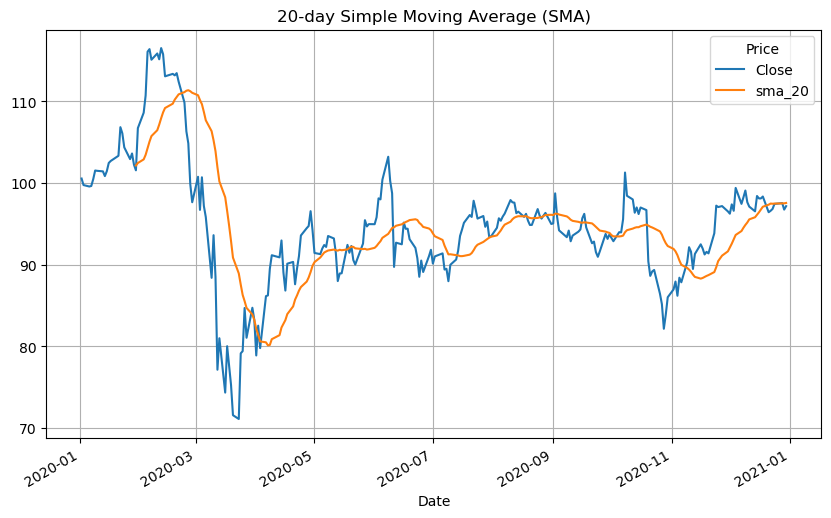

In [37]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
df[["Close", "sma_20"]].plot(title="20-day Simple Moving Average (SMA)", grid=True, figsize=(10,6));

**5. Calculate and plot the Bollinger bands:**

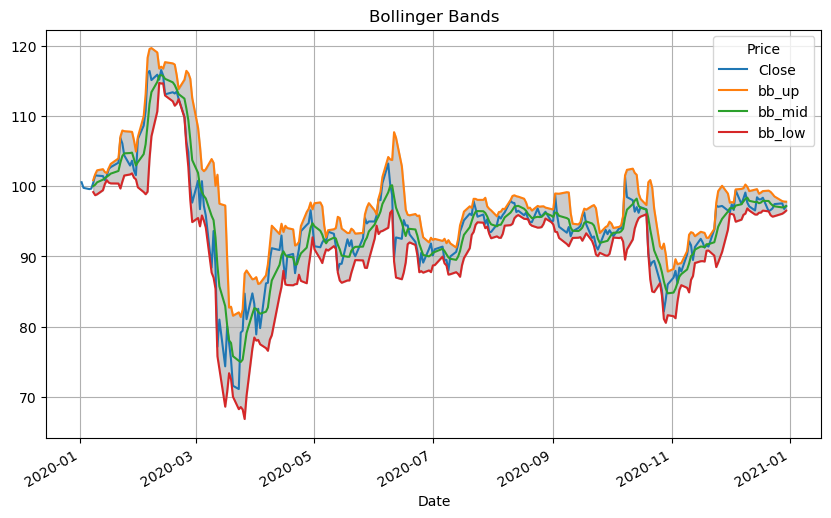

In [48]:
import matplotlib.pyplot as plt
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])
fig, ax = plt.subplots()
(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands", grid=True,figsize=(10,6))
)
ax.fill_between(df.index, df["bb_low"], df["bb_up"],
                color="gray",
alpha=.4);

**6. Calculate and plot the RSI:**

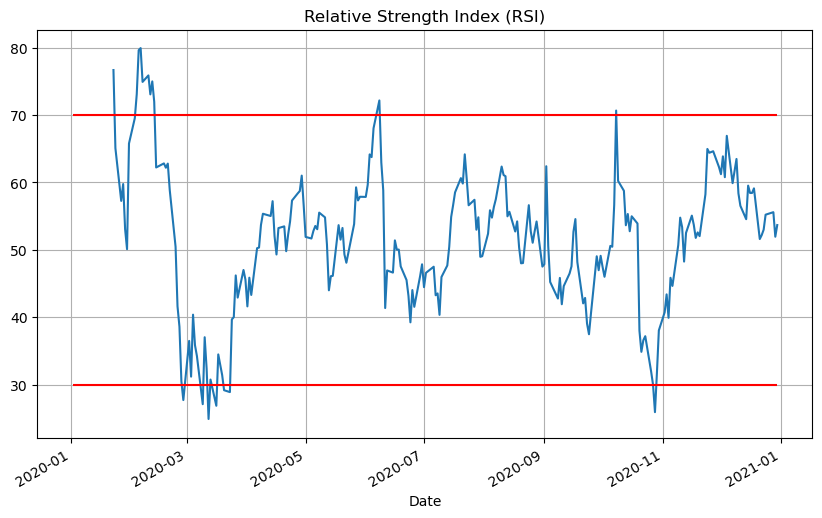

In [53]:
df["rsi"] = talib.RSI(df["Close"])
fig, ax = plt.subplots()
df["rsi"].plot(ax=ax,
               title="Relative Strength Index (RSI)", grid=True,figsize=(10,6))
ax.hlines(y=30,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color="red")
ax.hlines(y=70,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color="red")
plt.show()

**7. Calculate and plot the MACD:**

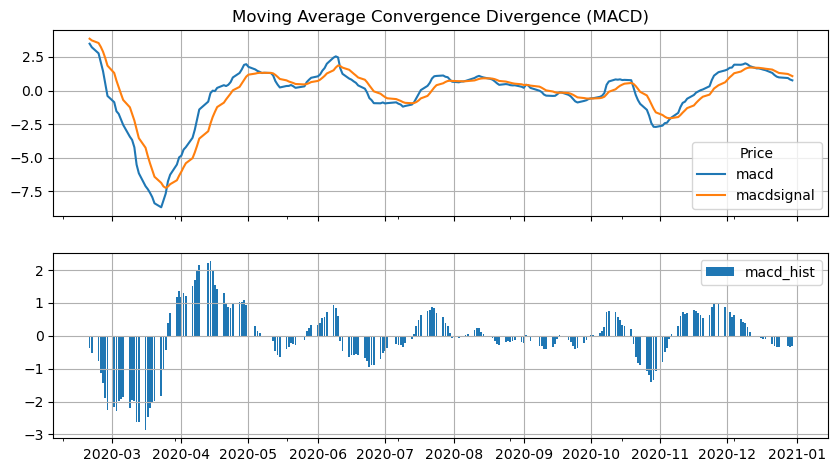

In [64]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)
fig, ax = plt.subplots(2, 1, sharex=True,figsize=(10,6))
(
    df[["macd", "macdsignal"]].
    plot(ax=ax[0],
         title="Moving Average Convergence Divergence (MACD)",grid=True)
)
ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
ax[1].legend()
ax[1].grid(True)

In [ ]:
### 